<div>
<img src="https://notebooks.dtcglaciers.org/_images/ESA_logo.svg" width="160" align='right'/>
</div>

# Further DTC-Glaciers features, work in progress

If necessary, install the DTCG API with:

```
!pip install 'dtcg[jupyter] @ git+https://github.com/DTC-Glaciers/dtcg'
```

In a cell below.

In [2]:
from dtcg.api.external import call
import dtcg.integration.oggm_bindings as dtcg_oggm
import dtcg.interface.plotting as dtcg_plotting
import holoviews as hv
import xarray as xr

In this notebook we showcase other features of DTC-Glacires which potentially can become usefull in the future.

## Streaming Datacubes

DTCG simplifies user interactions and saves on bandwidth costs by streaming data.
Streaming a datacube just requires the name of the glacier:

In [3]:
streamer = call.StreamDatacube()
datacube = streamer.stream_datacube(glacier="Bruarjökull")
datacube

TypeError: BindingsOggmModel.init_oggm() missing 1 required positional argument: 'working_dir'

We can also specify the datacube layer we want to access by using the ``layer`` argument:

In [ ]:
datacube_l1 = streamer.stream_datacube(glacier="Bruarjökull", layer="L1")
datacube_l1

Let's take a look at 2015, [which we know from another notebook was an anomalous year for Iceland](https://notebooks.dtcglaciers.org/notebooks/04_calibrate_with_eolis_data.ipynb).
We can compare the cumulative specific mass balance **observed by CryoSat-2** to the cumulative specific mass balance **modelled by OGGM**.
To make things simpler, we also combine the data with some glacier attributes from OGGM.
Again, we can do this using DTCG with just a few lines of code.

In [ ]:
rgi_id = "RGI60-06.00377"
dtcg_data = dtcg_oggm.BindingsCryotempo()
gdir = dtcg_data.get_glacier_directories(rgi_ids=[rgi_id], from_prepro_level=4, prepro_border=80)[0]
runoff_data = dtcg_data.get_aggregate_runoff(gdir=gdir)

We can plot this interactively.

In [ ]:
graph_artist = dtcg_plotting.BokehGraph()
artist = dtcg_plotting.BokehCryotempo()
fig_smb_cumulative = artist.plot_eolis_smb(
    datacube=datacube.L1, ref_year=2015, glacier_area=gdir.rgi_area_km2
).opts(title="a) Cumulative Specific Mass Balance (CryoSat)")
fig_runoff_cumulative = graph_artist.plot_runoff_timeseries(
    runoff=runoff_data["monthly_runoff"],
    ref_year=2015,
    cumulative=True,
).opts(title="b) Cumulative Monthly Runoff (OGGM)")
hv.Layout([fig_smb_cumulative, fig_runoff_cumulative]).opts(sizing_mode="stretch_width").opts(title="Bruarjökull, Iceland").cols(1)

We can see from **Figure a)** that Bruarjökull experienced a significant delay to the start of the 2015 summer season, which led to the highest winter cumulative specific mass balance since at least 2011.
**Figure b)** shows a corresponding decrease in monthly runoff. Indeed, [Landsvirkjun considered the annual inflow into Vatnajökull to be "very dry"](https://gogn.lv.is/files/Arsskyrslur/LV-Annual_Report_2015.pdf).


### Technical Implementation

Datacubes are streamed directly from a URL, and opened as data trees.
This is equivalent to accessing a ``GeoZarrHandler``'s ``data_tree`` attribute:

```
xr.open_datatree(
    stream_url="https://cluster.klima.uni-bremen.de/~dtcg/test_zarr/",
    group=None,
    chunks={},
    engine="zarr",
    consolidated=True,
    decode_cf=True,
)
```

A user will not download data unless they perform a processing step or call ``compute()``.

In [ ]:
datacube.L1.eolis_elevation_change_sigma_timeseries

## DTC-Glaciers API

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
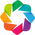

In [4]:
import dtcg
import dtcg.interface.gateway
import dtcg.interface.plotting

A user interacts with DTCG only through API requests.
This means a single centralised framework can handle requests from Jupyter notebooks, websites, and cli wrappers.
Flows are simplified for non-technical users, and can be customised for more advanced use cases.
It also prevents significant changes to the DTCG API interfering with existing flows, as little to no backend code is exposed to the user.

In [5]:
# User selects these via dropdown menus
subregion_name = "vent_rofenache"
glacier_name = "Hintereisferner"

API queries are extensible, as long as they conform to the OpenAPI standard.
For selecting a subregion, this is what an API query could look like:

In [6]:
# A query might look like this
user_query_params = {
    "action": "select_subregion",
    "region_name": "Central Europe",
    "subregion_name": subregion_name,
    "glacier_name": glacier_name,
    "shapefile_path": "nested_catchments_oetztal/nested_catchments_oetztal.shx",
    "oggm_params": {
        "use_multiprocessing": True,
        "rgi_version": "62",
        "store_model_geometry": True,
    },
}

A user can also select specific glaciers:

In [7]:
# A query might look like this
user_query_params = {
    "action": "select_glacier",
    "region_name": "Central Europe",
    "subregion_name": subregion_name,
    "glacier_name": glacier_name,
    "shapefile_path": "nested_catchments_oetztal/nested_catchments_oetztal.shx",
    "oggm_params": {
        "use_multiprocessing": True,
        "rgi_version": "62",
        "store_model_geometry": True,
    },
}
handler = dtcg.interface.gateway.GatewayHandler(query=user_query_params)
assert handler.response["response_code"] == "200"
data = handler.response["data"]

TypeError: BindingsOggmModel.init_oggm() missing 1 required positional argument: 'working_dir'

The API is very flexible: it can pass OGGM parameters directly to OGGM, and to preserve bandwidth a response can be customised to contain as little data as needed.

Components are standalone, and can be combined into different dashboards.

For this example, the response data are synthesised into interactive plots.
In a dashboard setting, these plots can also support real-time data.

In [8]:
dashboard = dtcg.interface.plotting.HoloviewsDashboard()
dashboard.plot_graph.plot_mass_balance(
    observations=data["runoff_data"]["wgms"],
    mass_balance=data["runoff_data"]["mass_balance"],
    name=handler.query.glacier_name,
)

NameError: name 'data' is not defined

All figures are generated using Holoviews, with Bokeh as a backend. Components can be accessed individually, or implemented into a dashboard. These can then be implemented into a frontend interface using FastAPI and Panel for web, and FastAPI and Celery for Jupyter notebooks.

In [9]:
dashboard = dtcg.interface.plotting.HoloviewsDashboardL2()
dashboard.plot_runoff_dashboard(
    data=data,
    subregion_name=handler.query.subregion_name,
    glacier_name="",
)

NameError: name 'data' is not defined